<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Numerical_Methods/Chapter24_Fourier_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**24. FOURIER TRANSFORM**
---
**Textbook**: Python Programming and Numerical Methods

####**24.1 THE BASICS OF WAVES**

There are many typs of waves in our environment. For example, if you throw a rock into a pond, you can see the waves form and travel in the water. There are many types of waves. Some of them are difficult to see, such as sound waves, earthquake waves, and microwaves. But in physics, a wave is a disturbance that travels through space and matter, with a transfering energy from one place to another. It is important to study waves in our life to understand how they form, travel, etc. This chapter will cover a basic tool that helps us understand and study waves - the **Fourier Transform**. But before we proceed, let us first familiarize ourselves with how to model waves mathematically.

#####**24.1.1 MODELING A WAVE USING MATHEMATICAL TOOLS**

We can model a single wave as a field with a function $F(x, t)$, where $x$ is the location of a point in space, while $t$ is the time. One simplest case is the shape of a sine wave change over $x$.

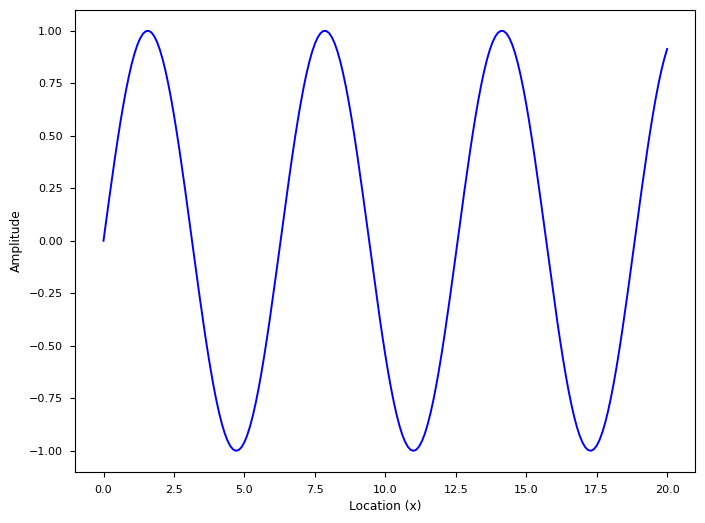

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8-paper")

x = np.linspace(0, 20, 201)
y = np.sin(x)

plt.figure(figsize = (8, 6))
plt.plot(x, y, "b")
plt.ylabel("Amplitude")
plt.xlabel("Location (x)")
plt.show()

A sine wave can change both in time and space. If we plot the changes at various locations, each time snapshot will be a sine wave changing with location. See the following figure with a fixed point at $x = 2.5$, showing as a red dot. Of course, you can see the changes over time at specific location as well; plot this by yourself.

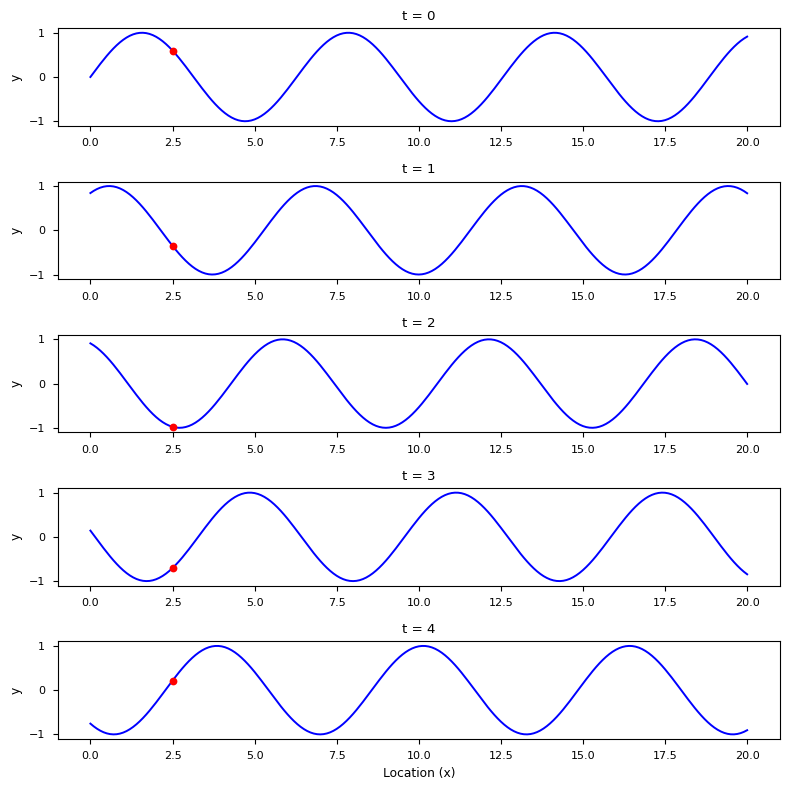

In [ ]:
fig = plt.figure(figsize = (8, 8))

times = np.arange(5)

n = len(times)

for t in times:
  plt.subplot(n, 1, t + 1)
  y = np.sin(x + t)
  plt.plot(x, y, "b")
  plt.plot(x[25], y[25], "ro")
  plt.ylim(-1.1, 1.1)
  plt.ylabel("y")
  plt.title(f"t = {t}")

plt.xlabel("Location (x)")
plt.tight_layout()
plt.show()

#####**24.1.2 CHARACTERISTICS OF A WAVE**

Waves can be a continuous entity both in time and space. For numerical purposes, one needs to digitize time and space at various points. For example, in the context of geophyscis, one can use sensors such as accelometers (which measure the acceleration of a movement) at different locations on the Earth to monitor earthquakes; this is called spatial discretization. Similarly, these sensors usually record the data at certain times, which is called temporal discretization. For a single wave, it has different characteristics.

**Amplitude** is used to describe the difference between the maximum values yto the baseline value. A sine wave is a periodic signal, which means it repeats itself after certain tie and can be measured by **period**. The period of a wave is the time it taks to finish the complete cycle. The **wavelength** measures the distance between two successive crests or throughs of a wave. The **frequency** describes the number of waves that pass a fixed location in a given amount of time. Frequency can be measured by how many cycles pss within 1 s. Therefore, the unit of frequency is cycles/second, or more commonly used **Hertz** (abbreviated **Hz**). Frequency is different from period, but they are related to each other. Frequncy refers to how often something happens while period refers to the time it takes to complete something, mathematically,

$$period = \frac{1}{frequency}.$$

Note that the blue dots shown in the figures above; these are the discretization points we plotted both in time and space; only at these dots did we sample the value of the wav. Usually when we record a wave, we need to specify how often we sample the wave in time; this is called **sampling**. This rate is called the **sampling rate**, in Hz. For example, if we sample a wave at 2Hz, it means that at every second we sample two data points. Now that we understand more about the basics of a wave, let us study a sine wave, which can be represented by the following equation:

$$y(t) = Asin(\omega\space{t} + \Phi)$$

where A is the amplitude of the wave, and $\omega$ is the **angular frquency**, which specifies how many cycles occur in a second, in radians per second; $\Phi$ is the **phase** of the signal. If $T$ is the period of the wave and *f* is the frequency of the wave, then $\omega$ has the following relationship to them:

$$\omega = \frac{2\pi}{T} = 2\pi\space{f}.$$



**TRY IT!** Generate two waves with time between zero and 1 s whose frequency is 5 and 10 Hz, respectively, sampled at 100 Hz. Plot the two waves and see the difference. Count how many cycles there are in 1 s.


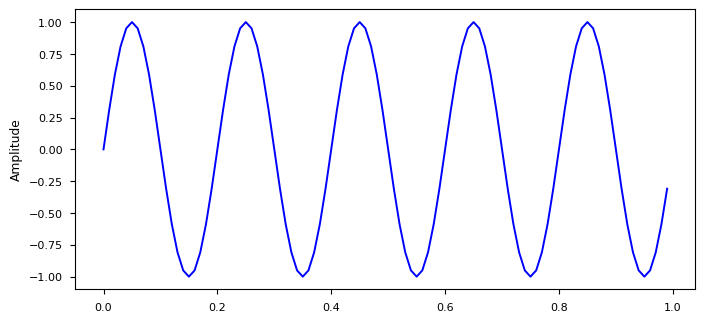

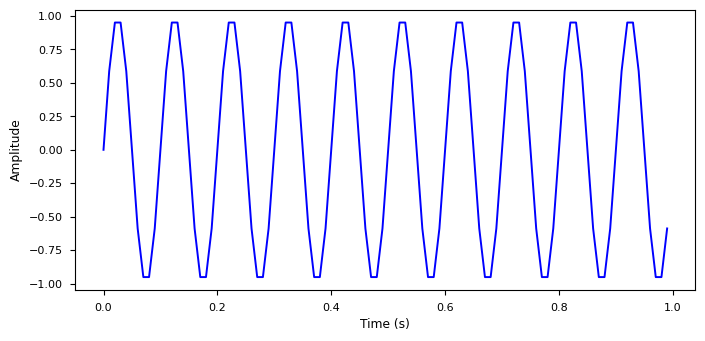

In [ ]:
# sampling rate
sr = 100.0
# sampling interval
ts = 1.0/sr
t = np.arange(0, 1, ts)

# frequency of the signal
freq_1, freq_2 = 5 , 10
y1 = np.sin(2*np.pi*freq_1*t)
y2 = np.sin(2*np.pi*freq_2*t)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y1, "b")
plt.ylabel("Amplitude")

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y2, "b")
plt.ylabel("Amplitude")

plt.xlabel("Time (s)")
plt.show()


**TRY IT!** Generate two sine waves with time between zero and 1 s. Both waves have a frequency of 5 Hz, sampled at 100 Hz, but their phase are zero and 10, respectively. The amplitudes of the two waves are 5 and 10, respectively. Plot th two waves and see the difference.

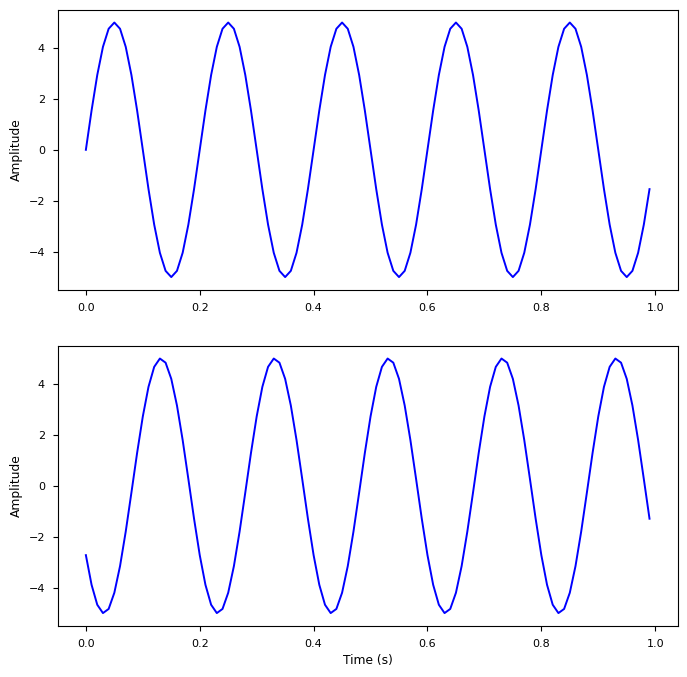

In [ ]:
# frequenciy of the signal
freq = 5
A1 = 5
A2 = 1*A1
omega = 10
y1 = A1*np.sin(2*np.pi*freq*t)
y2 = A2*np.sin(2*np.pi*freq*t + omega)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y1, "b")
plt.ylabel("Amplitude")

plt.subplot(212)
plt.plot(t, y2, "b")
plt.ylabel("Amplitude")

plt.xlabel("Time (s)")
plt.show()


####**24.2 DISCRETE FOURIER TRANSFORM (DFT)**

The previous section demonstrated how easy it is to characterize a wavw with period/frequency, amplitude, and phase. This only applies to simple perdiodic signals, suach as sine or cosine waves. For complicated waves, such characterization is not easy anymore. For example, the figures below is a relatively more complicated wave, and it is hard to say what is the frequency, and amplitude of the wave. There are more complicated cases i the real world. The **Fourier Transform** can be used for the purpose to study these waves It decomposes any signal into a sum of fundamental sine and cosine waves that easily measures the frequency, amplitude, and phase. The Fourier transform can be applied to continuous or discrete waves; *this chapter will only discuss the Discrete Fourier Transform (DFT)*.

Using the DFT, we can compose the signal ullustrated below to a series of sinusoids, with each of them having a different frequency. The following 3D figure shows the idea behind the DFT; the the irregular signal is actually the result of the sum of three different wavs. The time domain signal, which is is the irregular signal that can be transformed into a figure in the frequency domain, is called DFT amplidutde spectrum, where the signal frequencies are shown as vertical bars. The height of the bar after normalization is the amplitude of the signal in the time domain. Note that three vrtical bars correspond to the three frequencies of the sine wave, which are also plotted in the figure.  


<img src="https://pythonnumericalmethods.studentorg.berkeley.edu/_images/24.02.01-waves_with_3sine.jpg" width="400" height="300">

<img src="https://pythonnumericalmethods.studentorg.berkeley.edu/_images/24.02.02-time_frequency.png" width="400" height="300">



#####**24.2.1 DFT**

The DFT can transform a sequance of evenly spaced signals to the information about the frequency of all the sine waves needed to sum to obtain the time-domain signal. It is defined as

$$X_k = \sum_{n = 0}^{N-1}{x_n\cdot{e}^{-i2\pi{kn}/N}} = \sum_{n = 0}^{N-1}{x_n[cos(2\pi{kn}/N) - i\cdot{sin(2\pi{kn}/N)}]}$$

- $N$ = number of samples
- $n$ = current sample
- $k$ = current frequency, where $k\space {\epsilon}\space [0, N - 1]$  
- $x_n$ = the sine value at sample $n$
- $X_k$ = the DFT that includes information of both amplitude and phase

Also, the last expression in the above equation is derived from the *Euler's formula*, which links the trigonometric functions to the complex exponential function: $e^{i\cdot{x}} = cos(x) + i\cdot{sin(x)}$.

Due to the nature of the transform, $X_0 = \sum_{n = 0}^{N - 1}{x_n}$. If $N$ is an odd number, the elements $X_1, X_2, ..., X_{(N-1)/2}$ contain the positive frequency terms, and the elements $X_{(N+1)/2}, ..., X_{N-1}$ contain the negative frequency terms, in order of decreasingly negative frequency. If $N$ is even, the elements $X_1, X_2, ..., X_{(N/2) - 1}$ contain the positive frequency terms, and the elemnts $X_{N/2}, ..., X_{N-1}$ contain the negative frequency terms, in order of decreasingly negative frequency. In the case here, our input signal $x$ is a real-valued sequence; therefore, the DFT output $X_n$ for positive frequencies is the conjucate of the values $X_n$ for negative frequencies, and the spectrum will be symmetric. Usually, we only plot the DFT corresponding to the positive frequencies.

Note that $X_k$ is a complex number that encodes both the amplitude and phase information of a complex sinusoidal component $e^{i\cdot{2\pi{kn}}/N}$ of function $x_n$. The aplitude and phase of the signal can be calculated as


$$amp = \frac{|X_k|}{N} = \frac{\sqrt{Re(X_k)^2 + Im(X_k)^2}}{N}$$

$$phase = atan2(Im(X_k), Re(X_k))$$

where $Im(X_k)$ and $Re(X_k)$ ar the imaginary and real parts of the complex number, and $atan2$ is the two-argument form of the $arctan$ function.

The amplitudes returned by DFT are equal to the amplitudes of the signals fed into the DFT if we normalize them by the number of sample points. We mentioned previously that for a real-valued signal, the output of the DFT will be mirrored about the half of the sampling rate (as shown in the following examples). This half of the sampling rate is called the **Nyquist frequency**. This usually means that we only need to look at one side of the DFT result and drop the duplicate information i the other half; therefore, to obtain the amplitude corresponding to that of the time domain signal, we divide by $N/2$ instead of $N$.

Now that we have the basic knowledge of DFT, let us see how we can use it.


**TRY IT!** Generate three sine waves with frequencies 1, 4, and 7 Hz, amplitudes 3, 1, and 0.5, and phases being all zeros. Add these three sine waves together with a sampling rate of 100 Hz; it is the same signal shown at the beginning of the section.  

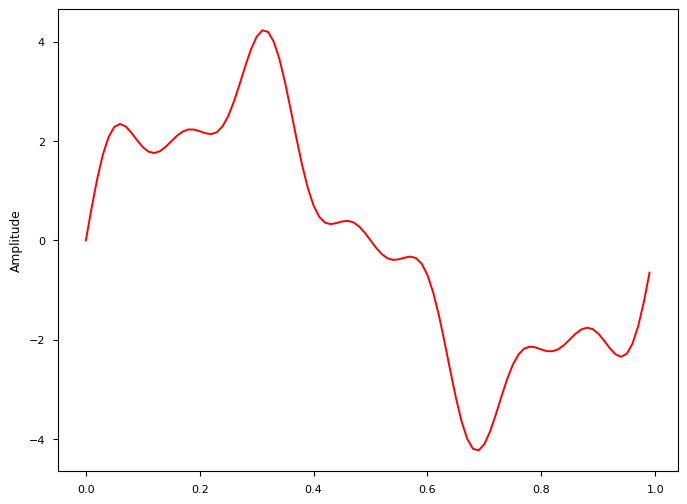

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8-paper")

# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr

t = np.arange(0, 1, ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, "r")
plt.ylabel("Amplitude")
plt.show()


**TRY IT!** Write a function DFT($x$) which takes in one argument, $x$, with a 1D real-valued signal. The function will calculate the DFT of the signal and return the DFT values. Apply this function to the signal that was generated previously and plot the result.

In [ ]:
def DFT(x):
  """
  Function to calculate the
  discrete Fourier Transform
  of a 1D real-valued signal x
  """

  N = len(x)
  n = np.arange(N)
  k = n.reshape((N, 1))
  e = np.exp(-2j*np.pi*k*n/N)

  X = np.dot(e, x)

  return X


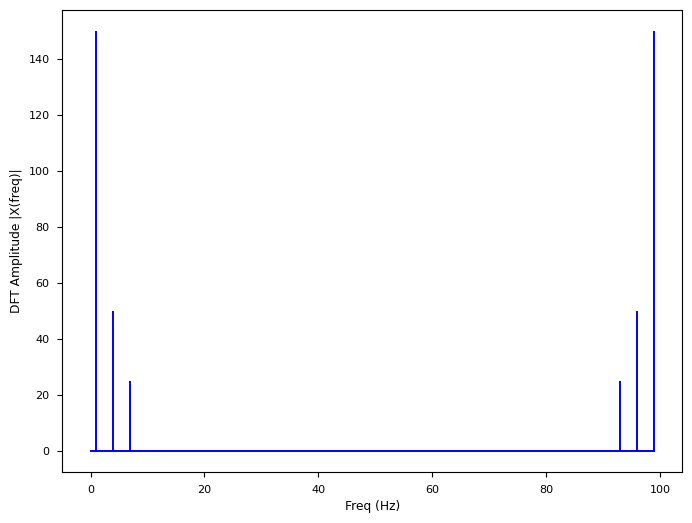

In [ ]:
# Calculate the frequency
X = DFT(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), "b", markerfmt = " ", basefmt = "-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.show()

Note that the output of the DFT is symmetric at half of the sampling rate (try different sampling rates for fun). As mentioned earlier, this half of the sampling rate is called the **Nyquist frequency** or the folding frequency. It is named after the electrical engineer Harry Nyquist. He and Claude Shannon formulated the Nyquist–Shannon sampling theorem, which states that a signal sampled at a rate can be fully reconstructed if it contains only frequency components below half that sampling frequency; thus, the highest frequency output from the DFT is half the sampling rate.  

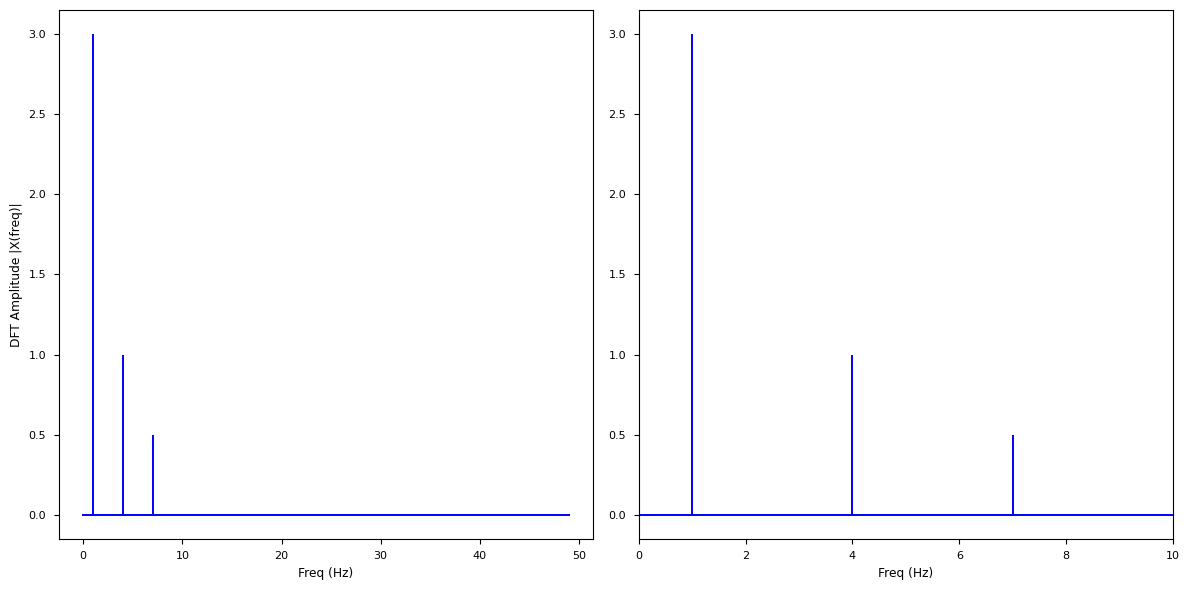

In [ ]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside = X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), "b", markerfmt = " ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), "b", markerfmt="", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


Ploting the first half of the DFT results shows three clear peaks at frequency of 1, 4, and 7 Hz, with amplitude 3, 1, 0.5, as expected. This is how we can use the DFT to analyze an arbitrary signal by decomposing it into a simple sine waves.

#####**24.2.2 THE INVERSE DFT**

We can easily compute the inverse transform of the DFT:

$$x_n = \frac{1}{N}\sum_{k = 0}^{N - 1}{X_k\cdot{e^{i\cdot{2{\pi}kn}/N}}}.$$



#####**24.2.3 THE LIMIT OF DFT**

The main issue with the above DFT implementation is that it is not efficient if we have a signal with many data points. It may take a long time to compute the DFT if the signal is large.

**TRY IT** Write a function to generate a simple signal with different sampling rate, and see the difference in computing time by varying the sampling rate.

In [ ]:
def gen_sig(sr):
  """
  function to generate
  a simple 1D signal with
  different sampling rate
  """
  ts = 1.0/sr
  t = np.arange(0, 1, ts)

  freq = 1.
  x = 3*np.sin(2*np.pi*freq*t)

  return x

In [ ]:
# sampling rate 2000
sr_1 = 2048
%timeit DFT(gen_sig(sr_1))

268 ms ± 8.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# sampling rate 20000
#sr_2 = 20000
#%timeit DFT(gen_sig(sr_2))

The increasing number of data points will require a lot of computation time using this DFT. Luckily, the *Fast Fourier Transform (FFT)*, popularized by Cooley and Tukey in their 1965 paper [FFT](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/), can solve this problem efficiently.


####**24.3 FAST FOURIER TRANSFORM (FFT)**

The **Fast Fourier Transform (FFT)** is an eficient algorithm used to calculate the DFT of a sequence. First described in Cooley and Tukey's classic paper in 1965, the idea can be traced back to Gauss's unpublished work in 1805. It is a divide-and-conquer algorithm that recursively breaks the DFT into smaller DFTs to reduce the number of computations. As a result, it succesfuly reduces the complexity of the DFT from $O(n^2)$ to $O(n\space{log(n)})$, where $n$ is the size of the data. This reduction in computation time is significant, especially for data with large $N$ and FFT is widely used in engineering, science, and mathematics for this reason. This section is heavily based on the tutorial developed by Jake VanderPlas [FFT Tutorial](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/).



#####**24.3.1 SYMMETRIES IN THE DFT**

The answer to how does the FFT speedup the computing of DFT lies in the exploitation of the symmetries in the DFT. Let us study the symmetries in the DFT. From the definition of the DFT equation

$$X_k = \sum_{n = 0}^{N-1}{x_n\cdot{e^{-i\cdot{2\pi{kn}}/N}}}.$$

We can calculate

$$X_{k + N} = \sum_{n = 0}^{N-1}{x_n\cdot{e^{-i\cdot{2\pi{(k + N)n}}/N}}} = \sum_{n = 0}^{N-1}{x_n\cdot{e^{-i\cdot{2\pi{n}}}}}\cdot{e^{-i\cdot{2\pi{kn}}/N}}.$$

Note that $e^{-i\cdot{2\pi{n}}} = 1$; therefore, we have

$$X_{k + N} = \sum_{n = 0}^{N - 1}{x_n\cdot{e^{-i2\pi{kn}/N}}} = X_k,$$

with a little extension, we can have

$$X_{k + i\cdot{N}} = X_k, \space{for\space{any} \space{integer}\space{i}}.$$

Thus, within the DFT, clearly are some symmetries that we can use to reduce the computation.

#####**24.3.2 TRICKS IN FFT**

Given that there are symmetries in the DFT, we can consider using it to reduce the computation, because if we need to calculate both $X_k$ and $X_{k + N}$, we only need to do this once. This isexactly the idea behind the FFT. Cooley and Tukey showed that we can calculate DFT more efficiently if we continue to divide the problem into smaller ones. Let us divide the whole series into two parts, i.e., the eve and odd number parts:

$$X_k = \sum_{n = 0}^{N - 1}{x_n\cdot{e^{-i2\pi{kn}/N}}}$$

$$= \sum_{m = 0}^{N/2 - 1}{x_{2m}\cdot{e^{-i2\pi{k(2m)}/N}}} + \sum_{m = 0}^{N/2 - 1}{x_{2m+1}\cdot{e^{-i2\pi{k(2m+1)}/N}}}$$

$$= \sum_{m = 0}^{N/2 - 1}{x_{2m}\cdot{e^{-i2\pi{km}/(N/2)}}} + e^{-i2\pi{k}/N}\sum_{m = 0}^{N/2 - 1}{x_{2m+1}\cdot{e^{-i2\pi{km}/(N/2)}}}.$$

As shown, the two smaller terms, which only have half of the size $(N/2)$ in the above equation, are two smaller DFTs. For each of them, the $0\leq{m}\leq{\frac{N}{2}}$, but $0\leq{k}\leq{N}$; therefore, half of the values will be the same due to the summetry properties described above. Thus, we only need to calculate half of the fields in each term. Of course, we can continue to divide each term ito half with the even and odd values until it reaches the last two numbers, at which point the calculation will be really simple.

This is how FFT works using this recursive approach. Let us perform a quick and dirty implementation of the FFT. Note that the input signal to FFT should have a length of power of 2. If it is not, then we need to fill up zeros to the next power size of 2 size.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8-paper")

def FFT(x):
  """
  A recursive implementation of
  the 1D Cooley-Tukey FFT, the
  input should have a length of
  power of 2.
  """

  N = len(x)

  if N ==1:
    return x
  else:
    X_even = FFT(x[::2])
    X_odd = FFT(x[1::2])
    factor = np.exp(-2j*np.pi*np.arange(N)/N)
    X = np.concatenate((
                       X_even + factor[:int(N/2)] * X_odd,
                       X_even + factor[int(N/2):] * X_odd))
    return X

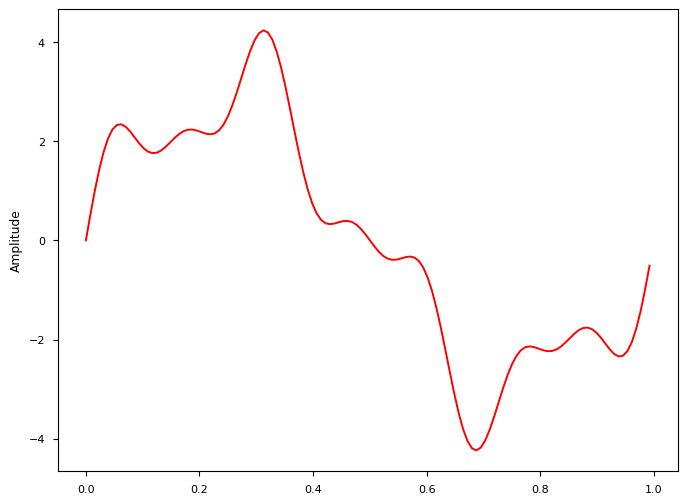

In [ ]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0, 1, ts)

freq_1 = 1.
x = 3*np.sin(2*np.pi*freq_1*t)

freq_2 = 4.
x += np.sin(2*np.pi*freq_2*t)

freq_3 = 7.
x += 0.5*np.sin(2*np.pi*freq_3*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, "r")
plt.ylabel("Amplitude")
plt.show()

**TRY IT!** Use the `FFT` function to calculate the Fourier transform of the above signal. Plot the amplitude spectrum for both th two-and one-sided frequencies.

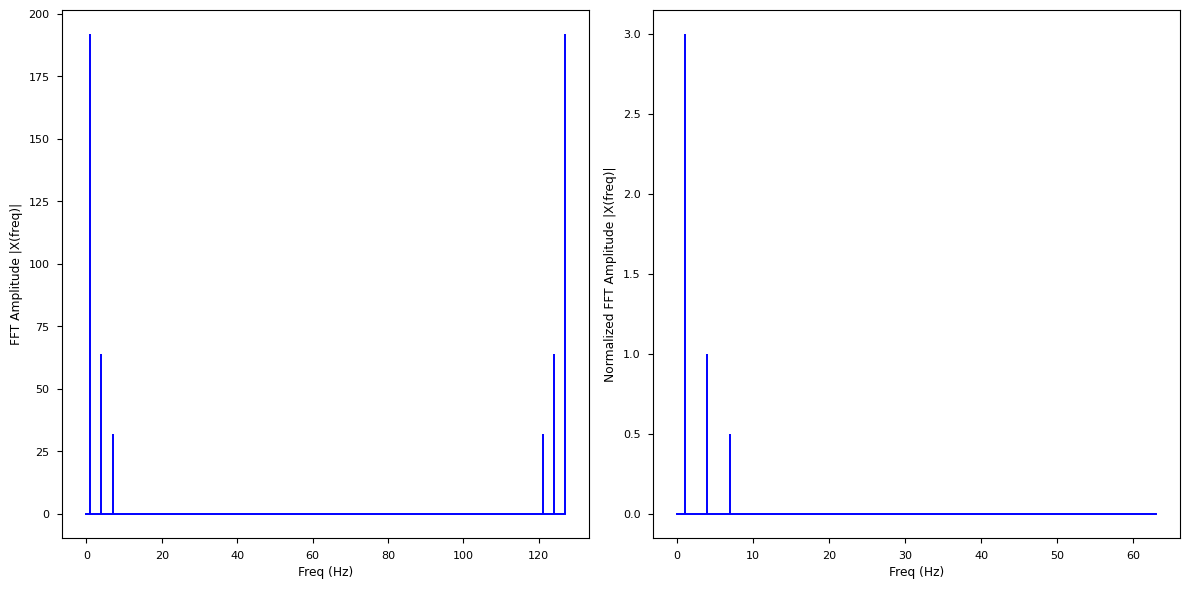

In [ ]:
X = FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), "b", markerfmt = " ", basefmt = "-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("FFT Amplitude |X(freq)|")

# Get the one-sided spectrum
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside = X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), "b", markerfmt = " ", basefmt = "-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("Normalized FFT Amplitude |X(freq)|")
plt.tight_layout()
plt.show()

**TRY IT!** Generate a simple signal of length 2048, and record the time it will take to run the FFT; compare the speed with the DFT.

In [ ]:
def gen_sig(sr):
  """
  function to generate
  a simple 1D signal with
  different sampling rate
  """
  ts = 1.0/sr
  t = np.arange(0,1,ts)
  freq =1.
  x =3*np.sin(2*np.pi*freq*t)

  return x
# sampling rate =2048
sr = 2048
%timeit FFT(gen_sig(sr))


40.1 ms ± 7.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


####**24.4 FFT IN PYTHON**

Python has very mature FFT functions both in `Numpy` and `SciPy`. This section will take a look at both packages and see how easily they can be incorporated in our work. Let us use the signal genrated above torun the test as shown in the figure above.

#####**24.4.1 FFT IN `NUMPY`**

**EXAMPLE:** Use the `fft` and `ifft` functions from `NumPy` to calculate the FFT amplitude spectrum and inverse FFT to obtain the original signal. Plot both results. Time the `fft` function using this 2000-length signal.

In [ ]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0, 1, ts)

freq_1 = 1.
x = 3*np.sin(2*np.pi*freq_1*t)

freq_2 = 4.
x += np.sin(2*np.pi*freq_2*t)

freq_3 = 7.
x += 0.5*np.sin(2*np.pi*freq_3*t)

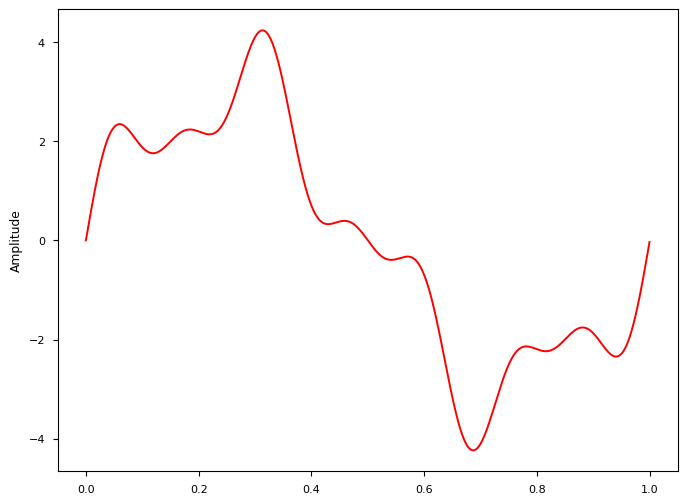

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(t, x, "r")
plt.ylabel("Amplitude")
plt.show()

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


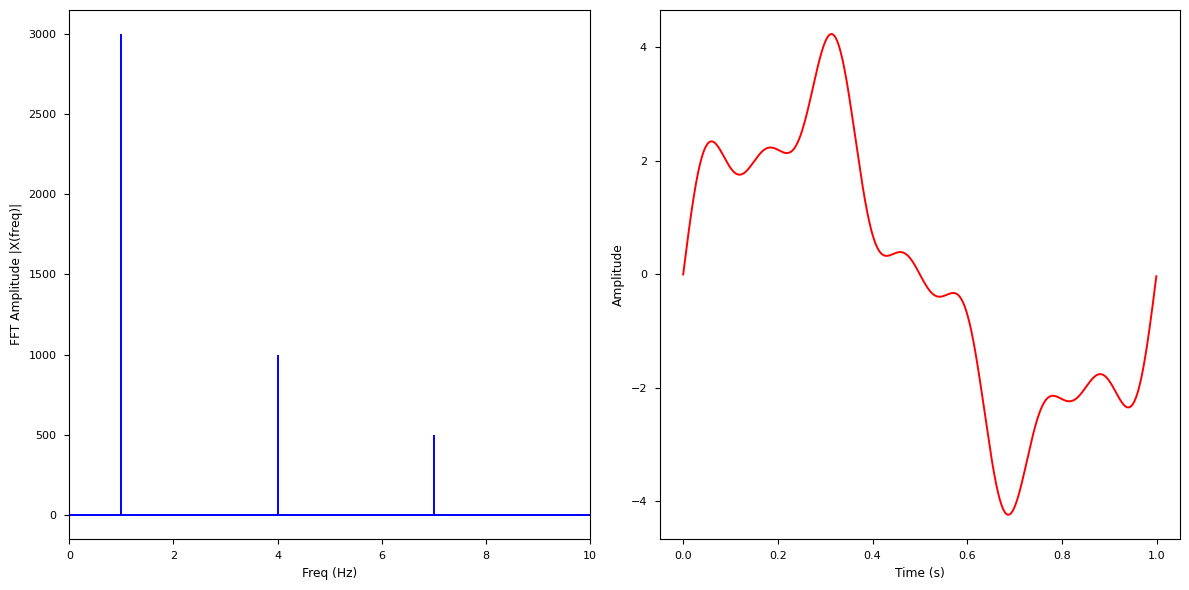

In [ ]:
from numpy.fft import fft, ifft
#sr = 2000
#x = gen_sig(sr)
X = fft(x)

# Recalculate N, T, and freq based on the new signal x
N = len(x)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), "b", markerfmt = " ", basefmt = "-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("FFT Amplitude |X(freq)|")
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), "r")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [ ]:
%timeit fft(x)

107 µs ± 8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


####**24.4.2 FFT IN `SCIPY`**

**EXAMPLE:** Use `fft` and `ifft` functions from `SciPy` to calculate the FFT amplitude spectrum and inverse FFT to obtain the original signal. Plot both results. Time the `fft` function using this 2000-length signal.

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


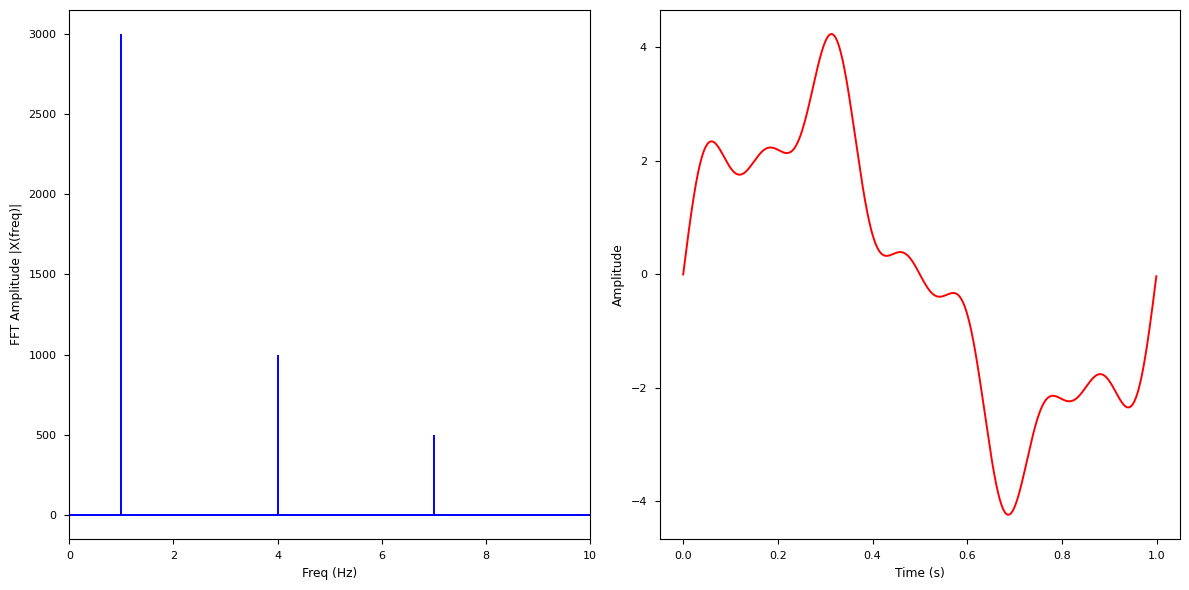

In [ ]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), "b", markerfmt = " ", basefmt = "-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("FFT Amplitude |X(freq)|")
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), "r")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [ ]:
%timeit fft(x)

34 µs ± 8.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Note that the built-in FFT functions are much faster and easier to use, especially when using the `SciPy` version. Here are the results for comparison:

- Implemented DFT: 120 ms
- Implemented FFT: 16.9 ms
- `NumPy` FFT: 42.3 $\mu{s}$
- `SciPy` FFT: 12.6 $\mu{s}$

#####**24.4.3 MORE EXAMPLES**

######***24.4.3.1 Electricity Demand in California***

First, we explore the electricity demand from California from 2019-11-30 to 2019-12-30.



In [ ]:
import pandas as pd
data_id = "1zIj84W0C6nFJBXjVXZ4aB0aRmM8s497c"
# Load data as Dataframes
columns = ['Region', 'UTC time', 'Local date', 'Hour', 'Local time', 'Time zone',
       'Demand forecast', 'Demand', 'Net generation', 'Total interchange']
#df = pd.read_csv('some_data.csv', usecols = ['col1','col2'], low_memory = True)
df = pd.read_csv(
     f"https://docs.google.com/spreadsheets/d/{data_id}/export?format=csv",
     usecols = columns, low_memory = True)
df.head()

,Region,UTC time,Local date,Hour,Local time,Time zone,Demand forecast,Demand,Net generation,Total interchange
0,CAL,01Jul2015 8:00:00,01Jul2015,1,01Jul2015 1:00:00,Pacific,"35,264","38,210","31,005","-7,412"
1,CAL,01Jul2015 9:00:00,01Jul2015,2,01Jul2015 2:00:00,Pacific,"32,894","35,171","28,760","-6,671"
2,CAL,01Jul2015 10:00:00,01Jul2015,3,01Jul2015 3:00:00,Pacific,"31,360","33,243","27,179","-6,306"
3,CAL,01Jul2015 11:00:00,01Jul2015,4,01Jul2015 4:00:00,Pacific,"30,579","31,955","25,660","-6,551"
4,CAL,01Jul2015 12:00:00,01Jul2015,5,01Jul2015 5:00:00,Pacific,"30,723","31,199","24,961","-6,491"


In [ ]:
df.columns

Index(['Region', 'UTC time', 'Local date', 'Hour', 'Local time', 'Time zone',
       'Demand forecast', 'Demand', 'Net generation', 'Total interchange'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89904 entries, 0 to 89903
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Region             89904 non-null  object
 1   UTC time           89904 non-null  object
 2   Local date         89904 non-null  object
 3   Hour               89904 non-null  int64 
 4   Local time         89904 non-null  object
 5   Time zone          89904 non-null  object
 6   Demand forecast    89904 non-null  object
 7   Demand             89880 non-null  object
 8   Net generation     89880 non-null  object
 9   Total interchange  89880 non-null  object
dtypes: int64(1), object(9)
memory usage: 6.9+ MB


In [ ]:
columns_num = ['Demand forecast', 'Demand', 'Net generation', 'Total interchange']
for col in columns_num:
    df[col] = df[col].str.replace(',', '')
df.head()

,Region,UTC time,Local date,Hour,Local time,Time zone,Demand forecast,Demand,Net generation,Total interchange
0,CAL,01Jul2015 8:00:00,01Jul2015,1,01Jul2015 1:00:00,Pacific,35264,38210,31005,-7412
1,CAL,01Jul2015 9:00:00,01Jul2015,2,01Jul2015 2:00:00,Pacific,32894,35171,28760,-6671
2,CAL,01Jul2015 10:00:00,01Jul2015,3,01Jul2015 3:00:00,Pacific,31360,33243,27179,-6306
3,CAL,01Jul2015 11:00:00,01Jul2015,4,01Jul2015 4:00:00,Pacific,30579,31955,25660,-6551
4,CAL,01Jul2015 12:00:00,01Jul2015,5,01Jul2015 5:00:00,Pacific,30723,31199,24961,-6491


In [ ]:
for col in columns_num:
    df[col] = pd.to_numeric(df[col])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89904 entries, 0 to 89903
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             89904 non-null  object 
 1   UTC time           89904 non-null  object 
 2   Local date         89904 non-null  object 
 3   Hour               89904 non-null  int64  
 4   Local time         89904 non-null  object 
 5   Time zone          89904 non-null  object 
 6   Demand forecast    89904 non-null  int64  
 7   Demand             89880 non-null  float64
 8   Net generation     89880 non-null  float64
 9   Total interchange  89880 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 6.9+ MB


In [ ]:
print(df)

      Region            UTC time Local date  Hour          Local time  \
0        CAL   01Jul2015 8:00:00  01Jul2015     1   01Jul2015 1:00:00   
1        CAL   01Jul2015 9:00:00  01Jul2015     2   01Jul2015 2:00:00   
2        CAL  01Jul2015 10:00:00  01Jul2015     3   01Jul2015 3:00:00   
3        CAL  01Jul2015 11:00:00  01Jul2015     4   01Jul2015 4:00:00   
4        CAL  01Jul2015 12:00:00  01Jul2015     5   01Jul2015 5:00:00   
...      ...                 ...        ...   ...                 ...   
89899    CAL   02Oct2025 3:00:00  01Oct2025    20  01Oct2025 20:00:00   
89900    CAL   02Oct2025 4:00:00  01Oct2025    21  01Oct2025 21:00:00   
89901    CAL   02Oct2025 5:00:00  01Oct2025    22  01Oct2025 22:00:00   
89902    CAL   02Oct2025 6:00:00  01Oct2025    23  01Oct2025 23:00:00   
89903    CAL   02Oct2025 7:00:00  01Oct2025    24   02Oct2025 0:00:00   

      Time zone  Demand forecast   Demand  Net generation  Total interchange  
0       Pacific            35264  38210.0   

In [ ]:
df_1 = df.copy()
df_1 = df_1.dropna()


<bound method DataFrame.info of       Region            UTC time Local date  Hour          Local time  \
0        CAL   01Jul2015 8:00:00  01Jul2015     1   01Jul2015 1:00:00   
1        CAL   01Jul2015 9:00:00  01Jul2015     2   01Jul2015 2:00:00   
2        CAL  01Jul2015 10:00:00  01Jul2015     3   01Jul2015 3:00:00   
3        CAL  01Jul2015 11:00:00  01Jul2015     4   01Jul2015 4:00:00   
4        CAL  01Jul2015 12:00:00  01Jul2015     5   01Jul2015 5:00:00   
...      ...                 ...        ...   ...                 ...   
89875    CAL   01Oct2025 3:00:00  30Sep2025    20  30Sep2025 20:00:00   
89876    CAL   01Oct2025 4:00:00  30Sep2025    21  30Sep2025 21:00:00   
89877    CAL   01Oct2025 5:00:00  30Sep2025    22  30Sep2025 22:00:00   
89878    CAL   01Oct2025 6:00:00  30Sep2025    23  30Sep2025 23:00:00   
89879    CAL   01Oct2025 7:00:00  30Sep2025    24   01Oct2025 0:00:00   

      Time zone  Demand forecast   Demand  Net generation  Total interchange  
0       Pacific            35264  38210.0         31005.0            -7412.0  
1       Pacific            32894  35171.0         28760.0            -6671.0  
2       Pacific            31360  33243.0         27179.0            -6306.0  
3       Pacific            30579  31955.0         25660.0            -6551.0  
4       Pacific            30723  31199.0         24961.0            -6491.0  
...         ...              ...      ...             ...                ...  
89875   Pacific            35890  36966.0         29354.0            -7435.0  
89876   Pacific            35020  36422.0         28894.0            -6947.0  
89877   Pacific            33833  35496.0         28207.0            -6760.0  
89878   Pacific            32009  33986.0         26507.0            -6991.0  
89879   Pacific            30116  32325.0         24627.0            -7440.0  

[89880 rows x 10 columns]>

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89880 entries, 0 to 89879
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             89880 non-null  object 
 1   UTC time           89880 non-null  object 
 2   Local date         89880 non-null  object 
 3   Hour               89880 non-null  int64  
 4   Local time         89880 non-null  object 
 5   Time zone          89880 non-null  object 
 6   Demand forecast    89880 non-null  int64  
 7   Demand             89880 non-null  float64
 8   Net generation     89880 non-null  float64
 9   Total interchange  89880 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.5+ MB


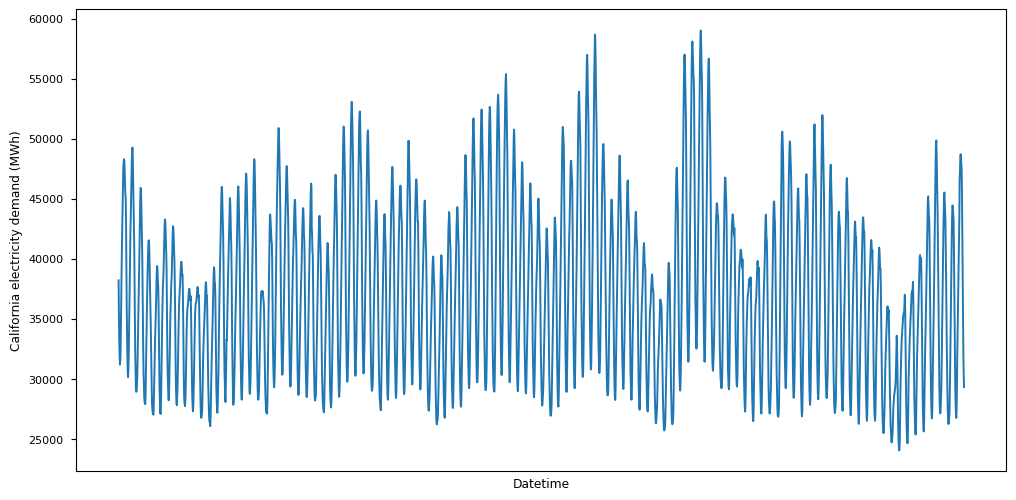

In [ ]:
import matplotlib.pyplot as plt
df_loc = df_1.iloc[0:2500]
plt.figure(figsize = (12, 6))
plt.plot(df_loc['Local time'], df_loc["Demand"])
plt.xlabel("Datetime")
plt.ylabel("California electricity demand (MWh)")
plt.xticks([]) # Hide labels
plt.show()